In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# -- Importing Flask dependency
from flask import Flask

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# -- Module 9 Challenge: 
# -- Importing Extract
#    Resource: https://stackoverflow.com/questions/11616260/how-to-get-all-objects-with-a-date-that-fall-in-a-specific-month-sqlalchemy/31641488
from sqlalchemy import extract  

In [6]:
# -- Connect to database file 
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

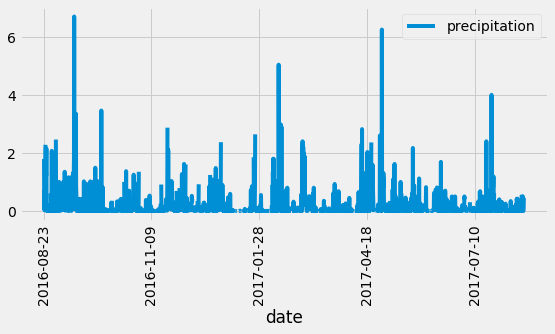

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
#print(df.to_string(index=False))

# Sort the dataframe by date
df = df.sort_index()
#print(df.to_string(index=False))

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(8, 4))

plt.tight_layout()

plt.xticks(rotation=90)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [14]:
# What are the most active stations?
session.query(Measurement.station, func.count(Measurement.station)).\
	group_by(Measurement.station)

# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


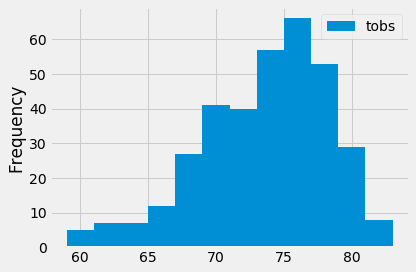

In [84]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.tobs)

results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
#print(results)

df = pd.DataFrame(results, columns=['tobs'])
print(df)

df.plot.hist(bins=12)
plt.tight_layout()


In [17]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    if not end:
        results = session.query(*sel).filter(Measurement.date <= start).all()
        temps = list(np.ravel(results))
        return jsonify(temps)
    results = session.query(*sel).filter(Measurement.date >= start).filter(Measurement.date <= end).all()
    temps = list(np.ravel(results))
    return jsonify(temps)

# Challenge

In [18]:
# -- Module 9 Challenge:
#    Instructions: Complete the following steps.
#    1. Identify key statistical data in June across all of the stations 
#       and years using the describe() function.
#    2. Identify key statistical data in December across all stations and 
#       years using the describe() function.
#    3. Share your findings in the Jupyter Notebook with a few sentences 
#       describing the key differences in weather between June and December 
#       and 2-3 recommendations for further analysis.

# -- Step 1: June Statistical Data

# Perform a query to retrieve June Data
june_results = []

# -- Extracting measurements from June dates 
# -- Resource: https://stackoverflow.com/questions/11616260/how-to-get-all-objects-with-a-date-that-fall-in-a-specific-month-sqlalchemy/31641488 
june_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date)== 6).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
june_df = pd.DataFrame(june_results, columns=['date', 'precipitation', 'temperature'])
june_df.set_index(june_df['date'], inplace = True)

# Sort the dataframe by date
june_df = june_df.sort_index()

# print(june_df.to_string(index=False))

# -- Displaying statistical data with describe() function. 
june_df.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


In [19]:
# -- Step 2: December Statistical Data

# Perform a query to retrieve December Data
dec_results = []

# -- Extracting measurements from June dates 
# -- Resource: https://stackoverflow.com/questions/11616260/how-to-get-all-objects-with-a-date-that-fall-in-a-specific-month-sqlalchemy/31641488 
dec_results = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).filter(extract('month', Measurement.date)== 12).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
dec_df = pd.DataFrame(dec_results, columns=['date', 'precipitation', 'temperature'])
dec_df.set_index(dec_df['date'], inplace = True)

# Sort the dataframe by date
dec_df = dec_df.sort_index()

# print(dec_df.to_string(index=False))

# -- Displaying statistical data with describe() function. 
dec_df.describe()

,precipitation,temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000


<b>Step 3: Key Findings/Differences and Recommendations for Further Analysis</b>

Retrieved the statistical data for the months of June and December across all years to represent the peaks of summer and winter seasons. 

Overall, June had a max temperature of 85 degrees and min temperature of 64 degrees versus December’s max temperature of 83 degrees and min temperature of 56 degrees. The standard deviation for temperature for both June and December are close – 3.25 and 3.74 respectively-- meaning stable temperatures are maintained for each season. 

In regard to precipitation, December has a max of 6.42 inches and average of .21 inches, and June has a max of 4.43 inches and average of .13 inches, in which the winter season would have more rain that would slow down tourism and business. 

<b>Recommendation(s) for Further Analysis:</b>

•	Extending the date range for statistical data from a singular month to the 3 months within a season, such as June, July, August for summer, and December, January, February for winter.

•	Focusing on the station data that are located near possible spots that the business will be located at and comparing the data to see if there are any significant changes. 

•	Performing analysis on the closest date ranges that have the least amount of rainfall and highest temperatures that may or may not fall within or between the summer and winter months. By discovering this, it could give a better view of the total range of months when the business would be sustainable with the most customers and when to expect declines when said range of months ends. 
